In [1]:
import pandas as pd
import joblib
import shap

# Load the model
model = joblib.load('xgb_model.pkl')

# Load validation data
X_val = pd.read_csv('processed_data/val_features.csv')
y_val = pd.read_csv('processed_data/val_labels.csv')

# Make predictions
y_pred = model.predict(X_val)


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# Initialize SHAP explainer and compute SHAP values
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_val)

[01:30:21] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


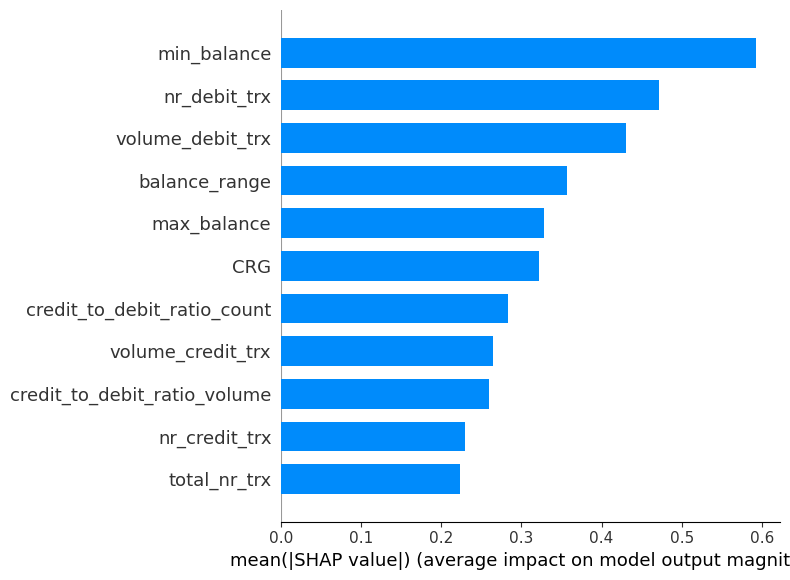

In [3]:
shap.summary_plot(shap_values, X_val, plot_type="bar")